In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob

import datetime as dt

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# # import JMA data
# files = glob.glob('../data/JMA_cruises/*/*.WAT')

# jma_nuts = pd.DataFrame(columns = ['theta','sal','depth','nitrate','lon','lat','year', 'month','day','profile'])
# pp=1

# for f in files[2:4]:
#     try:
# #         print f
#         tmp = open(f)
#         tmp = tmp.readlines()[0:1]
#         print str(tmp).split(',')[3]
#     except ValueError:
#         continue
#     except KeyError:
#         continue

In [3]:
# import JMA data
files = glob.glob('../data/JMA_cruises/*/*.WAT')
jma_nuts = pd.DataFrame(columns = ['theta','sal','depth','nitrate','lon','lat','date', 'year', 'month','day','profile','cruise', 'vessel'])
pp=1

for f in files:
    try:
#         print f
        tmp = open(f)
        tmp = tmp.readlines()[4:6]
        lat = np.int(str(tmp).split(',')[7].split('-')[0])
        lat = lat + (np.float(str(tmp).split(',')[7].split('-')[1].split('N')[0]))/60

        lon = np.int(str(tmp).split(',')[9].split('-')[0])
        lon = lon + (np.float(str(tmp).split(',')[9].split('-')[1].split('E')[0]))/60

        year = np.int(str(tmp).split(',')[3].split('/')[0])
        month = np.int(str(tmp).split(',')[3].split('/')[1])
        day = np.int(str(tmp).split(',')[3].split('/')[2])
        date = str(tmp).split(',')[3]
        
        tmp = open(f)
        tmp = tmp.readlines()[0:1]
        ship = str(tmp).split(',')[1]
        cruise = str(tmp).split(',')[3]

        tmp = pd.read_csv(f, sep = ',', skiprows = 6)
        tmp = tmp[1:]
        tmp.rename(columns=lambda x: x.strip(), inplace=True)
        tmp = tmp[['THETA','CTDSAL','CTDDEP','NO2+NO3']].rename(columns={'THETA':'theta','CTDSAL':'sal','CTDDEP':'depth','NO2+NO3':'nitrate'})
        tmp['lon'] = lon
        tmp['lat'] = lat
        tmp['date'] = date
        tmp['year'] = year
        tmp['month'] = month
        tmp['day'] = day
        tmp['profile'] = pp
        tmp['cruise'] = cruise
        tmp['vessel'] = ship
        pp += 1

        jma_nuts = jma_nuts.append(tmp).reset_index(drop=True)
    except ValueError:
        continue
    except KeyError:
        continue

    
jma_nuts['density'] = sw.rho(jma_nuts['sal'], jma_nuts['theta'],0)-1000
jma_nuts['depth'] = pd.to_numeric(jma_nuts['depth'])

933
144.007666667 170.035166667
2010.0 2016.0


/Users/archie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


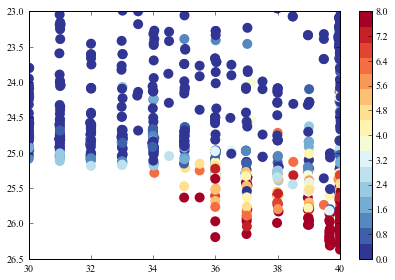

In [4]:
subset = jma_nuts[(jma_nuts['lat']>30) & (jma_nuts['lat']<45) & (jma_nuts['depth']<100) & (jma_nuts['month']>4) & (jma_nuts['month']<11) & (jma_nuts['lon']>144)]
print len(subset)

palette = plt.get_cmap('RdYlBu_r', 16)

plt.scatter(subset['lat'].values, subset['density'].values,100,  c = subset['nitrate'].values, lw = 0, vmin = 0, vmax = 8, cmap = palette)
plt.colorbar()
plt.axis([30, 40, 26.5, 23])

print np.min(subset['lon']), np.max(subset['lon'])
print np.min(subset['year']), np.max(subset['year'])

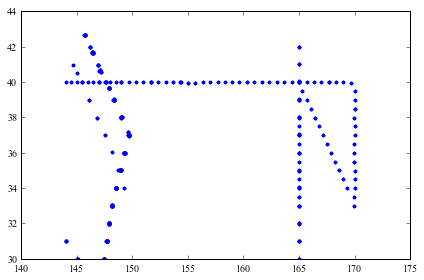

In [5]:
plt.plot(subset['lon'].values, subset['lat'].values, '.')
plt.show()

In [6]:
jma_nuts.to_csv('../data/jma_nitrate.csv', sep=',')

In [7]:
print np.max(jma_nuts['profile'])

529.0
